In [1]:
import numpy as np 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import cv2

2023-07-21 10:19:08.068426: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 10:19:08.553375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#setting directory 
base_filename = "skimage_norm_sat"
dir_path = f"/home/neureol/FD/preprocessed_clean_images/{base_filename}/"

Attempting loading images into the train_ds and valid_test_ds without batching

In [3]:
# setting train and tests size and batching parameters
val_size = 0.3
batch_size = None

In [4]:
# setting img parameters
img_height = 224
img_width = 224
img_size = (img_height, img_width)

In [5]:
# train dataset in batches
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = dir_path,
    validation_split=val_size,
    subset="training",
    seed=0,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
)

Found 3410 files belonging to 2 classes.
Using 2387 files for training.


2023-07-21 10:19:09.581218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-21 10:19:09.597899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-21 10:19:09.598052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
# looking up the train_ds info 
print(f"train_ds length: {len(train_ds)}")
print(f"train_ds type: {type(train_ds)}")

train_ds length: 2387
train_ds type: <class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


In [7]:
# combination of validation and test dataset in batches
val_test_ds  = tf.keras.utils.image_dataset_from_directory(
    directory = dir_path,
    validation_split=val_size,
    subset="validation",
    seed=0,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
)

Found 3410 files belonging to 2 classes.
Using 1023 files for validation.


In [8]:
# looking up the val_test_ds info
print(f"val_test_ds length: {len(val_test_ds)}")
print(f"val_test_ds type: {type(val_test_ds)}")

val_test_ds length: 1023
val_test_ds type: <class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


Attemping the conversion of val_test_ds to val_ds and test_ds

In [9]:
# setting validation and test split 
test_split = 0.3
test_size = int(len(val_test_ds)*test_split)

In [10]:
test_ds = val_test_ds.take(test_size)
val_ds = val_test_ds.skip(test_size)

In [11]:
# checking if the size of test_ds and val_ds is correct
print(f"test_ds length: {len(test_ds)}")
print(f"val_ds length: {len(val_ds)}")

test_ds length: 306
val_ds length: 717


Sanity check of train, test and valid dataset

2023-07-21 10:19:10.536014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2387]
	 [[{{node Placeholder/_4}}]]
2023-07-21 10:19:10.536200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2387]
	 [[{{node Placeholder/_4}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train img lbl: 1


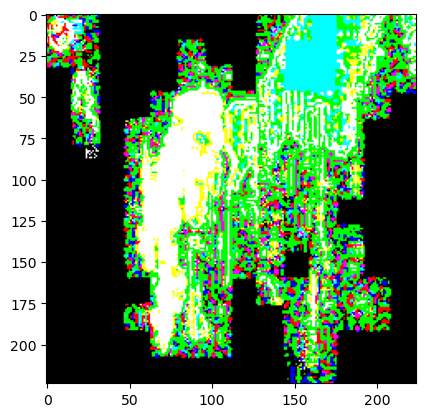

2023-07-21 10:19:10.803164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1023]
	 [[{{node Placeholder/_0}}]]
2023-07-21 10:19:10.803367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test img lbl: 1


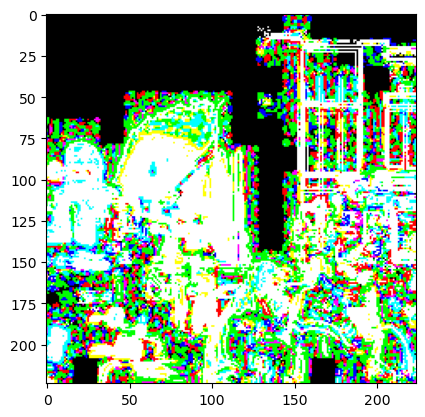

2023-07-21 10:19:11.068018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]
2023-07-21 10:19:11.068246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1023]
	 [[{{node Placeholder/_0}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


val img lbl: 1


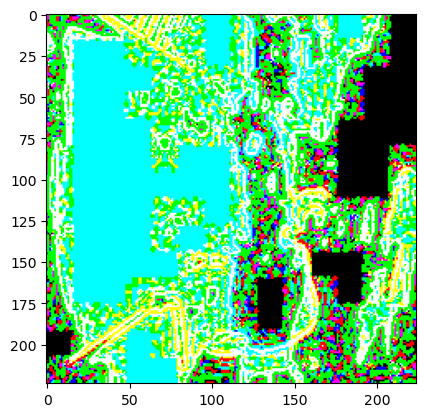

In [12]:
# train_ds
for img, lbl in train_ds:
    print(f"train img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

# test_ds
for img, lbl in test_ds:
    print(f"test img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

# val_ds
for img, lbl in val_ds:
    print(f"val img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

In [13]:
# data augmentation function
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    # layers.RandomRotation(0.2),
    # layers.RandomContrast(0.15)
])

rescale_layer = tf.keras.Sequential([
    layers.Rescaling(1./255)
])

Testing data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


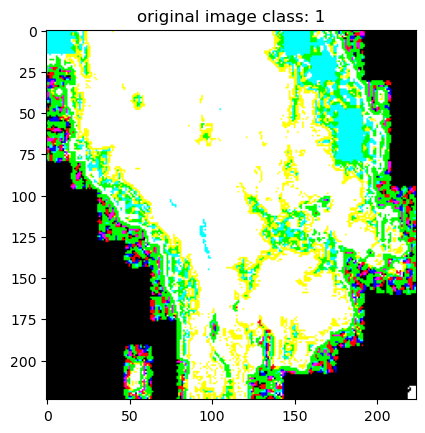

In [14]:
# extarcting an image for augmentation testing

image, lbl = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(f"original image class: {lbl}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


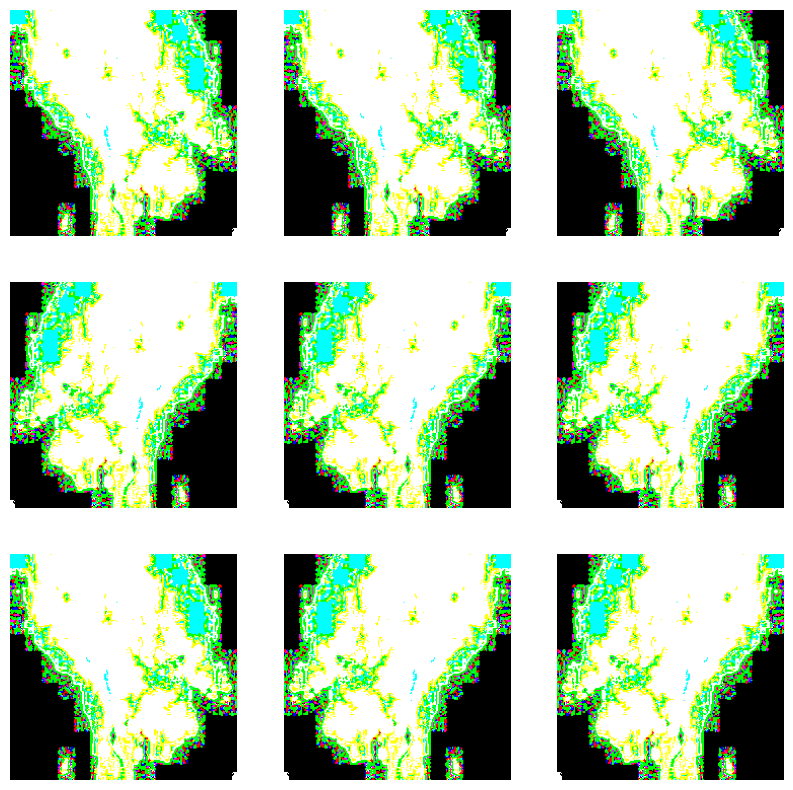

In [15]:
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [16]:
# Function to apply data augmentation to the dataset

batch_size = 100

AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
    # shuffle dataset if needed
    if shuffle:
        ds = ds.shuffle(1000)
    
    # batch the dataset 
    ds = ds.batch(batch_size)

    # rescale the dataset
    ds = ds.map(lambda x, y: (rescale_layer(x), y), num_parallel_calls=AUTOTUNE)

    # use data augment if needed 
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    
    # use buffered prefercting on all datasets
    return ds.prefetch(buffer_size=AUTOTUNE)

In [17]:
# applying augmentation to the train_ds
train_ds_augment = prepare(train_ds, shuffle=True, augment=True)
train_ds=prepare(train_ds,shuffle=True)
val_ds=prepare(val_ds)
test_ds=prepare(test_ds)
dataset= train_ds_augment.concatenate(train_ds)

In [18]:
print(type(train_ds_augment))
print(len(train_ds))
print(len(dataset))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
24
48


2023-07-21 10:19:12.395485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2387]
	 [[{{node Placeholder/_4}}]]
2023-07-21 10:19:12.395790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_24' with dtype resource
	 [[{{node Placeholder/_24}}]]


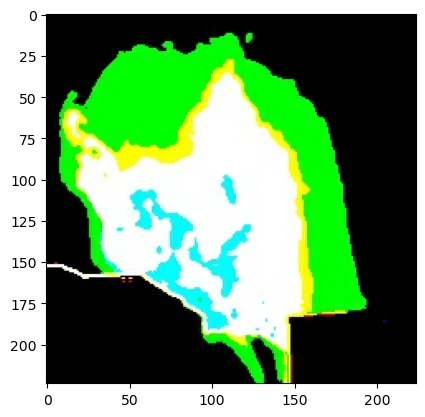

In [19]:
for img_list, lbl_list in train_ds_augment.take(4):
    plt.imshow(img_list[0])
    plt.show()
    break

In [20]:
# testing if augmentation works on the augmented dataset
for img_batch, lbl_batch in train_ds_augment:
    for img_list, lbl_list in zip(img_batch, lbl_batch):
        print(f"img_list shape: {img_list.shape}")
        print(f"lbl_list shape: {lbl_list.shape}")
        break
    break
        

2023-07-21 10:19:13.692277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2387]
	 [[{{node Placeholder/_4}}]]
2023-07-21 10:19:13.692565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2387]
	 [[{{node Placeholder/_4}}]]


img_list shape: (224, 224, 3)
lbl_list shape: ()


In [21]:
base_model=tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))# From imageNet
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1,activation='sigmoid')
preprocess_input = tf.keras.applications.resnet50.preprocess_input

base_model.trainable = False


inputs = tf.keras.Input(shape=(224, 224, 3))

# x = preprocess_input(inputs)
x = base_model(inputs, training=False)
# x = global_average_layer(x)
x= tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)




In [22]:
base_learning_rate = 0.0001
model.compile( loss='binary_crossentropy',
                optimizer ='adam', 
            # tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [23]:
initial_epochs=8
history = model.fit(dataset,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/8


2023-07-21 10:19:15.796306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_29' with dtype string and shape [2387]
	 [[{{node Placeholder/_29}}]]
2023-07-21 10:19:15.796677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_24' with dtype resource
	 [[{{node Placeholder/_24}}]]
2023-07-21 10:19:18.179929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-21 10:19:20.553565: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f0ed0684a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-21 1

48/48 [==============================] - ETA: 0s - loss: 0.7120 - accuracy: 0.7591

2023-07-21 10:19:31.386556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]
2023-07-21 10:19:31.386829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]


48/48 [==============================] - 18s 271ms/step - loss: 0.7120 - accuracy: 0.7591 - val_loss: 0.2884 - val_accuracy: 0.8884
Epoch 2/8
48/48 [==============================] - 11s 215ms/step - loss: 0.3139 - accuracy: 0.8682 - val_loss: 0.2410 - val_accuracy: 0.9038
Epoch 3/8
48/48 [==============================] - 11s 215ms/step - loss: 0.2763 - accuracy: 0.8904 - val_loss: 0.2447 - val_accuracy: 0.9024
Epoch 4/8
48/48 [==============================] - 11s 215ms/step - loss: 0.2511 - accuracy: 0.8951 - val_loss: 0.2485 - val_accuracy: 0.9093
Epoch 5/8
48/48 [==============================] - 11s 215ms/step - loss: 0.2290 - accuracy: 0.9083 - val_loss: 0.3073 - val_accuracy: 0.8745
Epoch 6/8
48/48 [==============================] - 11s 215ms/step - loss: 0.2151 - accuracy: 0.9141 - val_loss: 0.2324 - val_accuracy: 0.9121
Epoch 7/8
48/48 [==============================] - 11s 216ms/step - loss: 0.1835 - accuracy: 0.9294 - val_loss: 0.2045 - val_accuracy: 0.9219
Epoch 8/8
48/48 

In [24]:
base_model.trainable = True

In [25]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 200

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [26]:
model.compile( loss='binary_crossentropy',
              optimizer =tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080  

In [28]:
len(model.trainable_variables)

6

In [29]:
fine_tune_epochs = 8
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 8/16
48/48 [==============================] - 14s 227ms/step - loss: 0.1331 - accuracy: 0.9525 - val_loss: 0.2138 - val_accuracy: 0.9121
Epoch 9/16
48/48 [==============================] - 11s 216ms/step - loss: 0.1263 - accuracy: 0.9541 - val_loss: 0.2270 - val_accuracy: 0.9121
Epoch 10/16
48/48 [==============================] - 11s 216ms/step - loss: 0.1247 - accuracy: 0.9550 - val_loss: 0.2565 - val_accuracy: 0.9038
Epoch 11/16
48/48 [==============================] - 11s 215ms/step - loss: 0.1287 - accuracy: 0.9529 - val_loss: 0.2283 - val_accuracy: 0.9149
Epoch 12/16
48/48 [==============================] - 11s 216ms/step - loss: 0.1198 - accuracy: 0.9537 - val_loss: 0.2334 - val_accuracy: 0.9163
Epoch 13/16
48/48 [==============================] - 11s 216ms/step - loss: 0.1255 - accuracy: 0.9533 - val_loss: 0.2457 - val_accuracy: 0.9066
Epoch 14/16
48/48 [==============================] - 11s 216ms/step - loss: 0.1209 - accuracy: 0.9566 - val_loss: 0.2191 - val_accuracy: 0

In [30]:
from sklearn.metrics import accuracy_score
X_test=[]
y_test=[]
for img_batch,lbl_batch in test_ds:
    for img,lbl in zip(img_batch,lbl_batch):
        X_test.append(img)
        y_test.append(lbl)
X_test=np.array(X_test)
y_test=np.array(y_test)
predictions=model.predict(X_test)
print(predictions.shape)

prediction=[]
for i in predictions:
    if i>=0.5:
        prediction.append(1)
    else:
        prediction.append(0)
print(accuracy_score(prediction,y_test))

2023-07-21 10:22:29.719154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]
2023-07-21 10:22:29.719433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]


10/10 [==============================] - 2s 113ms/step
(306, 1)
0.9411764705882353


In [42]:
labels=tf.constant(y_test,dtype=tf.int32)
preds=tf.constant(prediction,dtype=tf.int32)
confusion_matrix=tf.math.confusion_matrix(labels,preds)
print("No. of True positives :",int(confusion_matrix[0][0]))
print("No. of False positives:",int(confusion_matrix[0][1]))
print("No. of False negatives:",int(confusion_matrix[1][0]))
print("No. of True negatives:",int(confusion_matrix[1][1]))
print("Percentage of fires predicted correctly:",float(100*(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))))
print("Percentage of non fires predicted as fires:",float(100*(confusion_matrix[0][1]/(confusion_matrix[0][1]+confusion_matrix[1][1]))))



No. of True positives : 90
No. of False positives: 7
No. of False negatives: 11
No. of True negatives: 198
Percentage of fires predicted correctly: 89.10891089108911
Percentage of non fires predicted as fires: 3.414634146341464


In [34]:

# model2.trainable = True# Let's take a look to see how many layers are in the base model
# # print("Number of layers in the base model: ", len(base_model.layers))

# # Fine-tune from this layer onwards
# # fine_tune_at = 5

# # ### START CODE HERE

# # # Freeze all the layers before the `fine_tune_at` layer
# for layer in model2.layers[:5]:
#      layer.trainable = False
# model2.summary()

In [35]:


# def model(input_shape):
    
#     input_t = tf.keras.Input(shape=input_shape)
#     base_model=tf.keras.Sequential()
#     base_model.add(model2)
#     base_model.add(tf.keras.layers.Flatten())
#     base_model.add(tf.keras.layers.Dropout(0.2))
#     base_model.add(tf.keras.layers.Dense(64, activation='relu'))
#     # base_model.add(tf.keras.layers.Dropout(0.25))
#     base_model.add(tf.keras.layers.Dense(32, activation='relu'))
#     base_model.add(tf.keras.layers.Dropout(0.2))
#     base_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#     return base_model

In [36]:
# base_model=model((224,224,3))

In [37]:
# base_model.summary()

In [38]:
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow import keras
# import datetime
# base_model.layers[0].trainable=False
# base_model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy',keras.metrics.Precision()])
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
# # file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')
# #history = base_model.fit(X_train,y_train,epochs=6)
# steps_per_epoch=10
# epochs=10
# history = base_model.fit(dataset,epochs=15,validation_data=val_ds,callbacks=[tensorboard_callback])